<a href="https://colab.research.google.com/github/nk876664-alpha/Movie_Review/blob/main/Augmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =========================
# 1️⃣ Install Libraries
# =========================
!pip install -q googletrans==4.0.0-rc1
import pandas as pd
from googletrans import Translator
from tqdm import tqdm
from google.colab import files

# =========================
# 2️⃣ Load Your Dataset
# =========================
df = pd.read_excel("/content/Movie_Reviews DataSet.xlsx")  # YOUR dataset path
print("Original Dataset Size:", len(df))

# =========================
# 3️⃣ Setup Translator
# =========================
translator = Translator()

def back_translate(text, src="bn", mid="en", dest="bn"):
    try:
        translated = translator.translate(text, src=src, dest=mid).text
        back_translated = translator.translate(translated, src=mid, dest=dest).text
        return back_translated
    except:
        return text

# =========================
# 4️⃣ Apply Back Translation
# =========================
augmented_reviews = []
augmented_labels = []

print("\n⏳ Augmenting data... Please wait!\n")

for review, label in tqdm(zip(df["Movie Review"], df["Sentiment"]), total=len(df)):
    new_review = back_translate(review)
    augmented_reviews.append(new_review)
    augmented_labels.append(label)

# =========================
# 5️⃣ Create Final Dataset
# =========================
df_aug = pd.DataFrame({
    "Movie Review": augmented_reviews,
    "Sentiment": augmented_labels
})

df_final = pd.concat([df, df_aug], ignore_index=True)
df_final = df_final.sample(frac=1).reset_index(drop=True)

print("\n🎉 Dataset Augmentation Completed!")
print("New Dataset Size:", len(df_final))
print(df_final.head())

# =========================
# 6️⃣ Save & Auto Download
# =========================
output_file = "Augmented_Bangla_Movie_Reviews.csv"
df_final.to_csv(output_file, index=False)
print("\n⬇️ Download Ready!")
files.download(output_file)



Original Dataset Size: 5000

⏳ Augmenting data... Please wait!



100%|██████████| 5000/5000 [23:14<00:00,  3.59it/s]


🎉 Dataset Augmentation Completed!
New Dataset Size: 10000
                                        Movie Review  Sentiment
0                      মুভি দেখতে দেখতে শেষটা ধরলাম।        2.0
1                      পরিবার সবাই মিলে উপভোগ করেছি।        1.0
2  কিছু জায়গায় গল্প একটু থেমে গিয়েছে, তবে আবার গত...        2.0
3  সিনেমাটি একবার দেখলে চলে, দ্বিতীয়বার দেখতে ইচ্...        2.0
4  ক্যামেরার অ্যাঙ্গেলগুলি দুর্দান্ত৷ প্রতিটি দৃশ...        1.0

⬇️ Download Ready!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
mr = pd.read_csv('/content/Augmented_Bangla_Movie_Reviews.csv')

In [ ]:
mr.shape

(10000, 2)

In [ ]:
mr.isnull().sum()

,0
Movie Review,2
Sentiment,2


In [ ]:
mr.head(10)

,Movie Review,Sentiment
0,মুভি দেখতে দেখতে শেষটা ধরলাম।,2.0
1,পরিবার সবাই মিলে উপভোগ করেছি।,1.0
2,"কিছু জায়গায় গল্প একটু থেমে গিয়েছে, তবে আবার গত...",2.0
3,"সিনেমাটি একবার দেখলে চলে, দ্বিতীয়বার দেখতে ইচ্...",2.0
4,ক্যামেরার অ্যাঙ্গেলগুলি দুর্দান্ত৷ প্রতিটি দৃশ...,1.0
5,আমি হাসতে হাসতে শেষ,0.0
6,"বেশ কিছু দৃশ্য দেখে মনে হয়, এগুলোর দরকারই ছিল...",0.0
7,বুবলীর জায়গায় এত সুন্দর অভিনয় আর কেউ করতে প...,1.0
8,"মন ছুঁয়ে যাওয়া, অনবদ্য অভিনয়,",1.0
9,"সিনেমার আবহ নির্মল, কিন্তু উত্তেজনা কম।",2.0


In [ ]:
mr.tail(10)

,Movie Review,Sentiment
9990,কেমন যেনো মুভিগুলো করে। হাসতে হাসতে পেট ব্যাথা...,0.0
9991,কি দেখে এদের নায়ক বানানো হয়,0.0
9992,"কিছু সংলাপ ভালো ছিল, কিছু একঘেয়ে।",2.0
9993,পুরো সিনেমাটি এতই বিরক্তিকর ছিল যে আমি মাঝপথেই...,0.0
9994,সিনেমায় কোনো ঐতিহাসিক বা সামাজিক বার্তা ছিল না।,2.0
9995,মূল কনফ্লিক্ট সহজবোধ্য এবং দর্শকের জন্য বোঝা স...,2.0
9996,খুব ভালো লাগলো । সত্যিই অসাধারণ মুভি।সময় এর স...,1.0
9997,এই সিনেমা শেষ হবার পরেও আমি দু-এক দিন ধরেই ভাব...,1.0
9998,ইন্ডিয়া এই সব ই চলে ফালতু মুভি শুধু এমবি খরচ,0.0
9999,প্রথমার্ধ অত্যন্ত ধীর।,0.0


In [ ]:
mr.columns

Index(['Movie Review', 'Sentiment'], dtype='object')

In [ ]:
mr.dropna()

,Movie Review,Sentiment
0,মুভি দেখতে দেখতে শেষটা ধরলাম।,2.0
1,পরিবার সবাই মিলে উপভোগ করেছি।,1.0
2,"কিছু জায়গায় গল্প একটু থেমে গিয়েছে, তবে আবার গত...",2.0
3,"সিনেমাটি একবার দেখলে চলে, দ্বিতীয়বার দেখতে ইচ্...",2.0
4,ক্যামেরার অ্যাঙ্গেলগুলি দুর্দান্ত৷ প্রতিটি দৃশ...,1.0
...,...,...
9995,মূল কনফ্লিক্ট সহজবোধ্য এবং দর্শকের জন্য বোঝা স...,2.0
9996,খুব ভালো লাগলো । সত্যিই অসাধারণ মুভি।সময় এর স...,1.0
9997,এই সিনেমা শেষ হবার পরেও আমি দু-এক দিন ধরেই ভাব...,1.0
9998,ইন্ডিয়া এই সব ই চলে ফালতু মুভি শুধু এমবি খরচ,0.0


In [ ]:
import os
columns_to_shuffled = ['Movie Review', 'Sentiment']
shuffled_mr = mr.sample(frac=1).reset_index(drop=True)
shuffled_mr = pd.concat([shuffled_mr.drop(columns=columns_to_shuffled), shuffled_mr],axis=1)
shuffled_mr.dropna(inplace=True)
shuffled_mr.to_excel("/content/Movie_Reviews DataSet (1).xlsx", index=False)
print(shuffled_mr)

                                           Movie Review  Sentiment
0                                    গল্পের শুরু কোথায়         0.0
1                             আহমকার মুভিদা খুব সুন্দর।        1.0
2                                   এটা কোনো অভিনয় হলো।        0.0
3     চরিত্রগুলির কোনও রসায়ন নেই; একে অপরের সাথে সম...        0.0
4     অসাধারণ অতুলনীয় ছবি আলমগীর ও সাবানার জুটি ফরিদ...        1.0
...                                                 ...        ...
9995  অনেক সুন্দর একটা ছবি। কতবার যে দেখছি নিজেও জানিনা        1.0
9996  গল্পের জট খুলতেই চাইল না, সবকিছু জটিল হয়ে ঝুল...        0.0
9997  সিনেমার লাইটিং এবং ভিজ্যুয়াল এফেক্টস অভিজ্ঞতা...        1.0
9998  সব মিলিয়ে একবার দেখা যায়, কিন্তু মনে গেঁথে থাক...        2.0
9999  তিনি এই চিত্রনাট্যটি খুব যত্ন সহকারে তৈরি করেছ...        1.0

[9996 rows x 2 columns]


In [ ]:
shuffled_mr.isnull().sum()

,0
Movie Review,0
Sentiment,0


In [ ]:
convert_dict = {
    'Movie Review': str,  # Use the actual column name 'Movie Review' with space
    'Sentiment': int
}

shuffled_mr = shuffled_mr.astype(convert_dict)
shuffled_mr

,Movie Review,Sentiment
0,গল্পের শুরু কোথায়,0
1,আহমকার মুভিদা খুব সুন্দর।,1
2,এটা কোনো অভিনয় হলো।,0
3,চরিত্রগুলির কোনও রসায়ন নেই; একে অপরের সাথে সম...,0
4,অসাধারণ অতুলনীয় ছবি আলমগীর ও সাবানার জুটি ফরিদ...,1
...,...,...
9995,অনেক সুন্দর একটা ছবি। কতবার যে দেখছি নিজেও জানিনা,1
9996,"গল্পের জট খুলতেই চাইল না, সবকিছু জটিল হয়ে ঝুল...",0
9997,সিনেমার লাইটিং এবং ভিজ্যুয়াল এফেক্টস অভিজ্ঞতা...,1
9998,"সব মিলিয়ে একবার দেখা যায়, কিন্তু মনে গেঁথে থাক...",2


In [ ]:
shuffled_mr['Sentiment'].value_counts()

,count
Sentiment,
2,3340
0,3328
1,3328


In [ ]:
shuffled_mr = shuffled_mr.drop_duplicates(subset=['Movie Review','Sentiment'])

In [ ]:
shuffled_mr['Movie Review'].value_counts()

,count
Movie Review,
তিনি এই চিত্রনাট্যটি খুব যত্ন সহকারে তৈরি করেছিলেন। সেখানে কোনও ফাঁকি ছিল না। পারফেক্ট কাজ,1
গল্পের শুরু কোথায়,1
আহমকার মুভিদা খুব সুন্দর।,1
এটা কোনো অভিনয় হলো।,1
"এই সিনেমার গল্প যুগ যুগ ধরে অমর হয়ে থাকবে,,,আজ সিনেমাটি দেখে চোখের পানি ধরে রাখতে পারিনি,,,মান্না সেরা অভিনেতা।",1
...,...
"শেষ পর্যন্ত, এটা মনে হয়েছিল - একটি সিনেমা নয়, কিন্তু একটি বড় খারাপ সিদ্ধান্ত।",1
প্লট জুড়ে অসংখ্য লজিক্যাল ভুল রয়েছে।,1
আচলকে কেন সিনেমায় নেওয়া হলো?অভিনয় করতে পারে না।অভিব্যক্তিহীন,1


<Axes: ylabel='Frequency'>

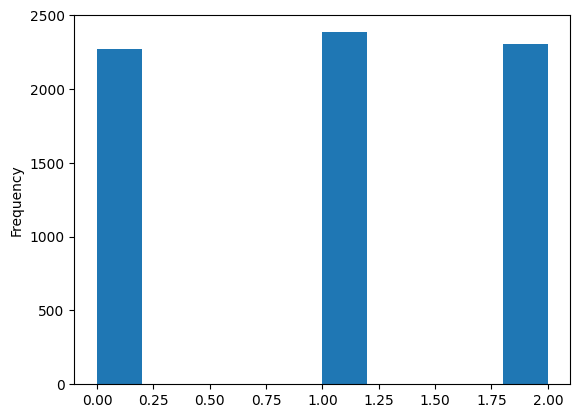

In [ ]:
shuffled_mr['Sentiment'].plot.hist()

In [ ]:
import string
def remove_punc(s):
  table = str.maketrans({key: None for key in string.punctuation})
  return s.translate(table)

In [ ]:
x=shuffled_mr['Movie Review'].apply(remove_punc)
x.shape

(6964,)

In [ ]:
x = shuffled_mr['Movie Review'].fillna('')
y = shuffled_mr['Sentiment']
print(x.head())
print(y.head())

0                                   গল্পের শুরু কোথায় 
1                            আহমকার মুভিদা খুব সুন্দর।
2                                  এটা কোনো অভিনয় হলো।
3    চরিত্রগুলির কোনও রসায়ন নেই; একে অপরের সাথে সম...
4    অসাধারণ অতুলনীয় ছবি আলমগীর ও সাবানার জুটি ফরিদ...
Name: Movie Review, dtype: object
0    0
1    1
2    0
3    0
4    1
Name: Sentiment, dtype: int64


In [ ]:
x=shuffled_mr['Movie Review'].apply(remove_punc)
x.shape

(6964,)

In [ ]:
contractions = {
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}

In [ ]:
#Preprocessing
import re
import string
from collections import Counter
vocab = Counter()
def clean_text(x,remove_stopwords = False):
    if True:
        new_text = []
        for word in x:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        x = "".join(new_text)
    # Format words and remove unwanted characters
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"


    x = re.sub(bangla_digits, " ", x)
    x = re.sub(punc, " ", x)
    x = re.sub(english_chars, " ", x)
    x = re.sub(bangla_fullstop, " ", x)
    x = re.sub(punctSeq, " ", x)
    x = whitespace.sub(" ", x).strip()


    x = re.sub(r'https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE)
    x = re.sub(r'\<a href', ' ', x)
    x = re.sub(r'&amp;‘:‘ ’', '', x)
    x = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]। ,', ' ', x)
    x = re.sub(r'<br />', ' ', x)
    x = re.sub(r'\'', ' ', x)
    x = re.sub(r"[\@$#%~+-\.\'।\"]"," ",x)
    x = re.sub(r"(?m)^\s+", "", x)
    x = re.sub("[()]","",x)
    x = re.sub("[‘’]","",x)
    x = re.sub("[!]","",x)
    x = re.sub("[/]","",x)
    x = re.sub("[:]","",x)
    x = re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',x)
    x = x.strip("/")


    if remove_stopwords:
        k = []
        with open('/content/Banglastopword.txt', 'r',encoding="utf-8") as f:
            for word in f:
                word = word.split()
                k.append(word[0])
            x = [t for t in x if t not in k]
            x = "".join(x)




    return x

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\['
<>:45: SyntaxWarning: invalid escape sequence '\ '
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\['
<>:45: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-3113145804.py:16: SyntaxWarning: invalid escape sequence '\s'
  whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
/tmp/ipython-input-3113145804.py:19: SyntaxWarning: invalid escape sequence '\['
  punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
/tmp/ipython-input-3113145804.py:45: SyntaxWarning: invalid escape sequence '\ '
  x = re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',x)


In [ ]:
#Feature Extractions
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer(analyzer=clean_text,encoding='utf-8').fit(x)

Model: Logistic Regression
Accuracy: 0.9088
Macro Precision: 0.9083
Macro Recall: 0.9090
Macro F1-score: 0.9085

Detailed classification report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       429
           1       0.92      0.89      0.90       481
           2       0.93      0.94      0.94       449

    accuracy                           0.91      1359
   macro avg       0.91      0.91      0.91      1359
weighted avg       0.91      0.91      0.91      1359



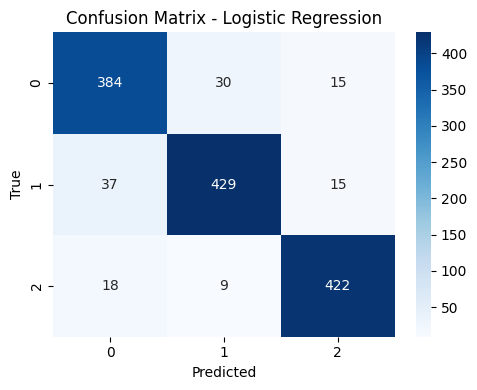

Model: Linear SVM
Accuracy: 0.9124
Macro Precision: 0.9121
Macro Recall: 0.9124
Macro F1-score: 0.9122

Detailed classification report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       429
           1       0.91      0.90      0.91       481
           2       0.95      0.94      0.95       449

    accuracy                           0.91      1359
   macro avg       0.91      0.91      0.91      1359
weighted avg       0.91      0.91      0.91      1359



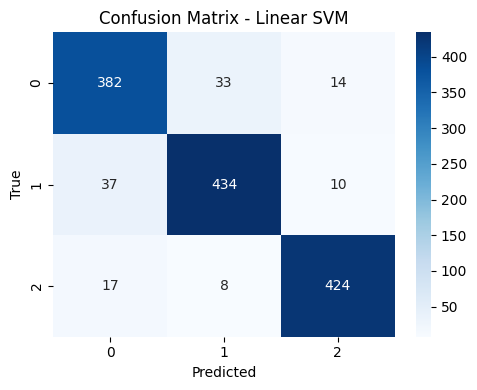

Model: RBF SVM
Accuracy: 0.9110
Macro Precision: 0.9104
Macro Recall: 0.9108
Macro F1-score: 0.9106

Detailed classification report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       429
           1       0.92      0.90      0.91       481
           2       0.93      0.94      0.94       449

    accuracy                           0.91      1359
   macro avg       0.91      0.91      0.91      1359
weighted avg       0.91      0.91      0.91      1359



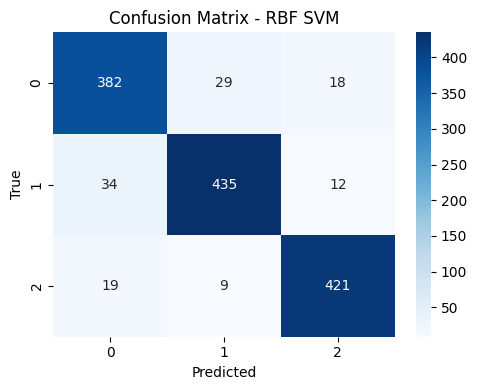

Model: KNN
Accuracy: 0.7689
Macro Precision: 0.7728
Macro Recall: 0.7709
Macro F1-score: 0.7691

Detailed classification report:
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       429
           1       0.82      0.70      0.75       481
           2       0.82      0.83      0.83       449

    accuracy                           0.77      1359
   macro avg       0.77      0.77      0.77      1359
weighted avg       0.78      0.77      0.77      1359



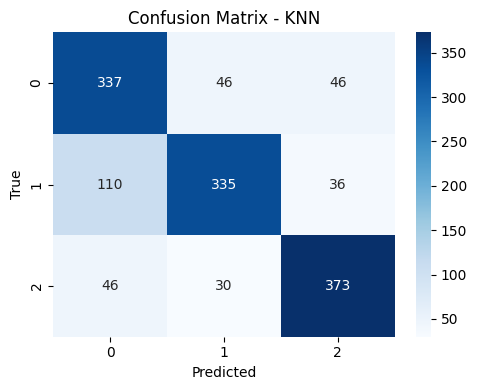

Model: Multinomial NB
Accuracy: 0.8550
Macro Precision: 0.8678
Macro Recall: 0.8519
Macro F1-score: 0.8516

Detailed classification report:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81       429
           1       0.84      0.89      0.86       481
           2       0.81      0.96      0.88       449

    accuracy                           0.86      1359
   macro avg       0.87      0.85      0.85      1359
weighted avg       0.87      0.86      0.85      1359



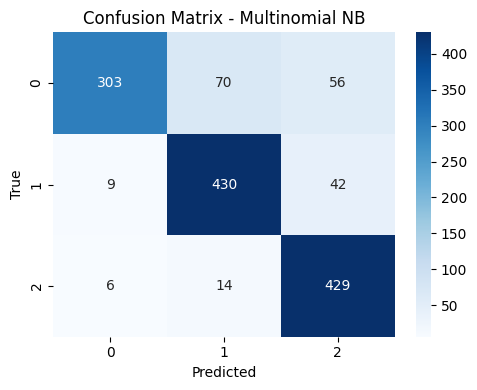

Model: Decision Tree
Accuracy: 0.7498
Macro Precision: 0.7537
Macro Recall: 0.7498
Macro F1-score: 0.7509

Detailed classification report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       429
           1       0.74      0.74      0.74       481
           2       0.85      0.79      0.82       449

    accuracy                           0.75      1359
   macro avg       0.75      0.75      0.75      1359
weighted avg       0.75      0.75      0.75      1359



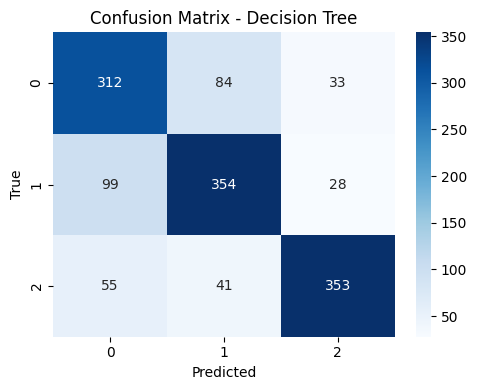

Model: Random Forest
Accuracy: 0.8852
Macro Precision: 0.8855
Macro Recall: 0.8862
Macro F1-score: 0.8848

Detailed classification report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       429
           1       0.92      0.84      0.88       481
           2       0.90      0.94      0.92       449

    accuracy                           0.89      1359
   macro avg       0.89      0.89      0.88      1359
weighted avg       0.89      0.89      0.89      1359



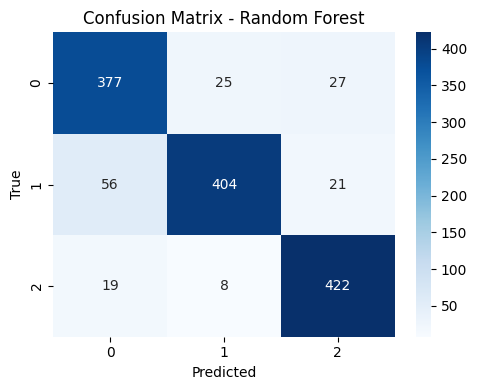

Model: Gradient Boosting
Accuracy: 0.8521
Macro Precision: 0.8568
Macro Recall: 0.8532
Macro F1-score: 0.8526

Detailed classification report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       429
           1       0.92      0.82      0.87       481
           2       0.90      0.86      0.88       449

    accuracy                           0.85      1359
   macro avg       0.86      0.85      0.85      1359
weighted avg       0.86      0.85      0.85      1359



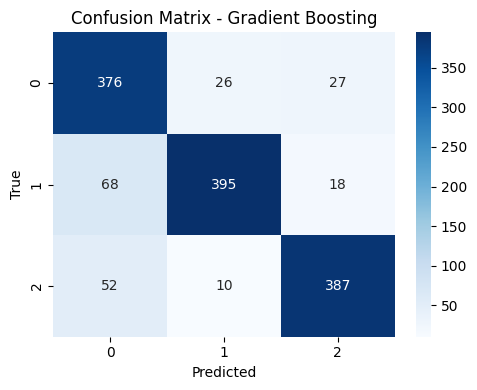

Model: XGBoost
Accuracy: 0.8896
Macro Precision: 0.8894
Macro Recall: 0.8895
Macro F1-score: 0.8894

Detailed classification report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       429
           1       0.90      0.88      0.89       481
           2       0.93      0.93      0.93       449

    accuracy                           0.89      1359
   macro avg       0.89      0.89      0.89      1359
weighted avg       0.89      0.89      0.89      1359



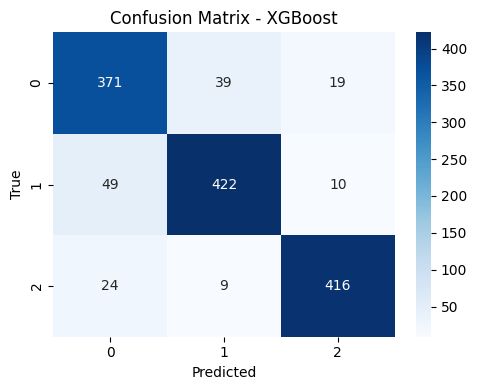

Model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.959527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 213836
[LightGBM] [Info] Number of data points in the train set: 5433, number of used features: 7761
[LightGBM] [Info] Start training from score -1.151913
[LightGBM] [Info] Start training from score -1.038085
[LightGBM] [Info] Start training from score -1.109159


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9161
Macro Precision: 0.9157
Macro Recall: 0.9161
Macro F1-score: 0.9158

Detailed classification report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       429
           1       0.92      0.90      0.91       481
           2       0.95      0.95      0.95       449

    accuracy                           0.92      1359
   macro avg       0.92      0.92      0.92      1359
weighted avg       0.92      0.92      0.92      1359



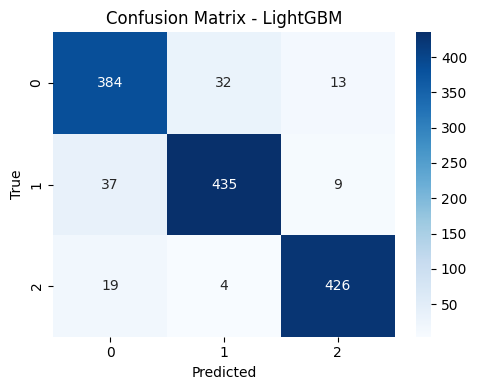

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


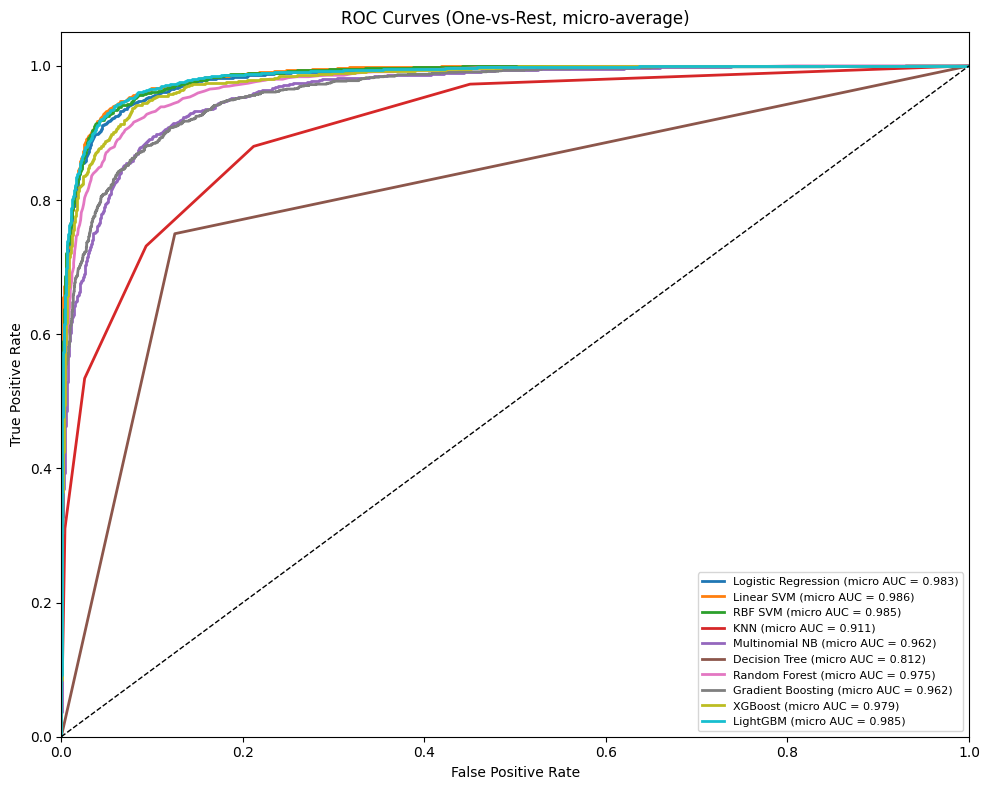


=== Overall Metrics Summary ===
                 Model  Accuracy  Macro Precision  Macro Recall  Macro F1
9             LightGBM  0.916115         0.915729      0.916082  0.915824
1           Linear SVM  0.912436         0.912087      0.912350  0.912187
2              RBF SVM  0.910964         0.910435      0.910816  0.910588
0  Logistic Regression  0.908756         0.908337      0.908954  0.908546
8              XGBoost  0.889625         0.889430      0.889548  0.889359
6        Random Forest  0.885210         0.885476      0.886190  0.884803
7    Gradient Boosting  0.852097         0.856790      0.853193  0.852583
4       Multinomial NB  0.855040         0.867816      0.851907  0.851555
3                  KNN  0.768948         0.772812      0.770916  0.769121
5        Decision Tree  0.749816         0.753742      0.749810  0.750928


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    roc_auc_score
)
from sklearn.preprocessing import label_binarize

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ===========================
# 1. Data split (same as you)
# ===========================
X = shuffled_mr[["Movie Review"]]
y = shuffled_mr["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ==========================================
# 2. Common TF-IDF (word + char) transformer
# ==========================================
tfidf_word = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1, 2),
    min_df=3,
    max_features=20000
)

tfidf_char = TfidfVectorizer(
    analyzer='char',
    ngram_range=(3, 5),
    min_df=3
)

features = ColumnTransformer([
    ('word', tfidf_word, 'Movie Review'),
    ('char', tfidf_char, 'Movie Review'),
])

# ==========================================
# 3. Define all models
# ==========================================
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        C=1.0
    ),
    "Linear SVM": SVC(
        kernel='linear',
        probability=True,
        class_weight='balanced',
        random_state=42
    ),
    "RBF SVM": SVC(
        kernel='rbf',
        probability=True,
        class_weight='balanced',
        random_state=42
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=5
    ),
    "Multinomial NB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced'
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='multi:softprob',
        eval_metric='mlogloss',
        random_state=42,
        n_jobs=-1
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=300,
        learning_rate=0.1,
        objective='multiclass',
        random_state=42,
        n_jobs=-1
    )
}

#==========================================
# 4. Train, evaluate, confusion matrix
#==========================================
results = []

for name, clf in models.items():
    print("="*60)
    print(f"Model: {name}")
    print("="*60)

    # Build pipeline: TF-IDF + model
    pipe = Pipeline([
        ('tfidf', features),
        ('clf', clf)
    ])

    # Train
    pipe.fit(X_train, y_train)

    # Predict
    y_pred = pipe.predict(X_test)

    # Metrics (macro)
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, average='macro', zero_division=0
    )

    print(f"Accuracy: {acc:.4f}")
    print(f"Macro Precision: {precision:.4f}")
    print(f"Macro Recall: {recall:.4f}")
    print(f"Macro F1-score: {f1:.4f}")
    print("\nDetailed classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    labels = sorted(y_test.unique())

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    # Save model + metrics for ROC later
    results.append({
        "name": name,
        "pipeline": pipe,
        "accuracy": acc,
        "precision_macro": precision,
        "recall_macro": recall,
        "f1_macro": f1
    })

# ==========================================
# 5. ROC Curve (One-vs-Rest for all models)
# ==========================================
# If binary, this still works; if multi-class, OvR
classes = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10, 8))

for res in results:
    name = res["name"]
    pipe = res["pipeline"]

    # Some models may not have predict_proba, but in this set all do
    y_score = pipe.predict_proba(X_test)

    if n_classes == 1:
        # Edge case: effectively binary with single column after binarize
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score[:, 0])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")
    else:
        # micro-average ROC
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (micro AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest, micro-average)")
plt.legend(loc="lower right", fontsize=8)
plt.tight_layout()
plt.show()

# ==========================================
# 6. Optional: summary table of metrics
# ==========================================
summary_df = pd.DataFrame([
    {
        "Model": r["name"],
        "Accuracy": r["accuracy"],
        "Macro Precision": r["precision_macro"],
        "Macro Recall": r["recall_macro"],
        "Macro F1": r["f1_macro"]
    }
    for r in results
])

print("\n=== Overall Metrics Summary ===")
print(summary_df.sort_values(by="Macro F1", ascending=False))


Model: Logistic Regression
Accuracy: 0.9031
Macro Precision: 0.9033
Macro Recall: 0.9034
Macro F1-score: 0.9030

Detailed classification report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       454
           1       0.92      0.87      0.89       477
           2       0.92      0.94      0.93       462

    accuracy                           0.90      1393
   macro avg       0.90      0.90      0.90      1393
weighted avg       0.90      0.90      0.90      1393



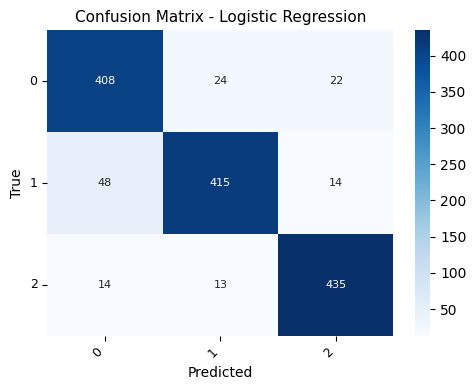

Model: Linear SVM
Accuracy: 0.9131
Macro Precision: 0.9140
Macro Recall: 0.9133
Macro F1-score: 0.9133

Detailed classification report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       454
           1       0.93      0.90      0.91       477
           2       0.95      0.94      0.94       462

    accuracy                           0.91      1393
   macro avg       0.91      0.91      0.91      1393
weighted avg       0.91      0.91      0.91      1393



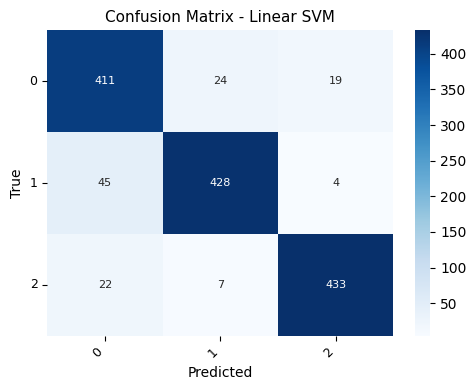

Model: RBF SVM
Accuracy: 0.9074
Macro Precision: 0.9078
Macro Recall: 0.9077
Macro F1-score: 0.9074

Detailed classification report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       454
           1       0.93      0.88      0.90       477
           2       0.93      0.94      0.94       462

    accuracy                           0.91      1393
   macro avg       0.91      0.91      0.91      1393
weighted avg       0.91      0.91      0.91      1393



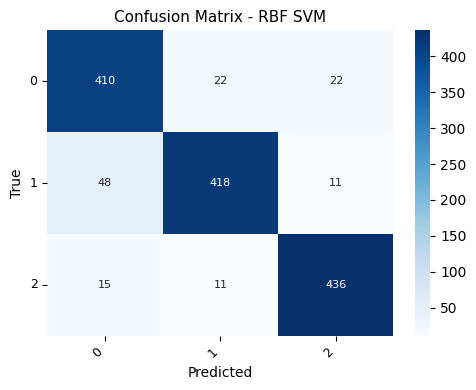

Model: KNN
Accuracy: 0.7653
Macro Precision: 0.7707
Macro Recall: 0.7665
Macro F1-score: 0.7647

Detailed classification report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.74       454
           1       0.82      0.67      0.74       477
           2       0.80      0.83      0.81       462

    accuracy                           0.77      1393
   macro avg       0.77      0.77      0.76      1393
weighted avg       0.77      0.77      0.76      1393



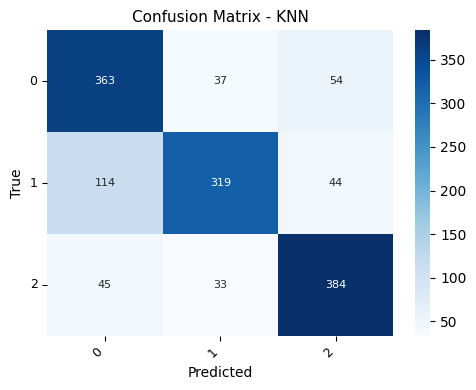

Model: Multinomial NB
Accuracy: 0.8471
Macro Precision: 0.8537
Macro Recall: 0.8459
Macro F1-score: 0.8434

Detailed classification report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       454
           1       0.84      0.88      0.86       477
           2       0.82      0.96      0.88       462

    accuracy                           0.85      1393
   macro avg       0.85      0.85      0.84      1393
weighted avg       0.85      0.85      0.84      1393



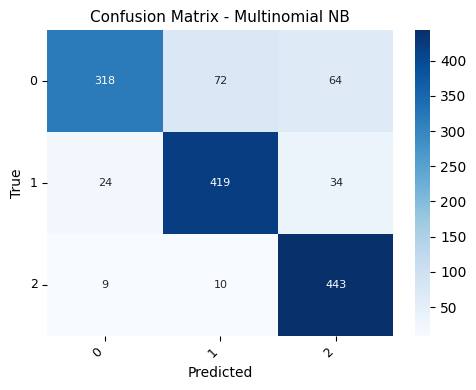

Model: Decision Tree
Accuracy: 0.7724
Macro Precision: 0.7735
Macro Recall: 0.7724
Macro F1-score: 0.7727

Detailed classification report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       454
           1       0.79      0.75      0.77       477
           2       0.84      0.83      0.84       462

    accuracy                           0.77      1393
   macro avg       0.77      0.77      0.77      1393
weighted avg       0.77      0.77      0.77      1393



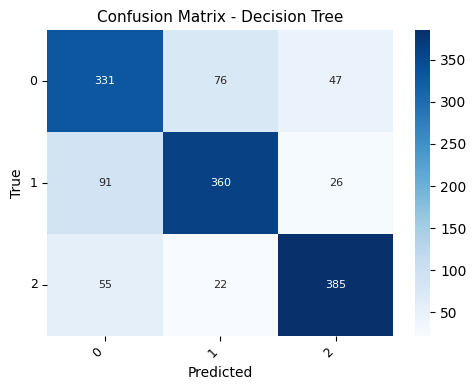

Model: Random Forest
Accuracy: 0.8894
Macro Precision: 0.8908
Macro Recall: 0.8898
Macro F1-score: 0.8890

Detailed classification report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       454
           1       0.94      0.85      0.89       477
           2       0.88      0.95      0.92       462

    accuracy                           0.89      1393
   macro avg       0.89      0.89      0.89      1393
weighted avg       0.89      0.89      0.89      1393



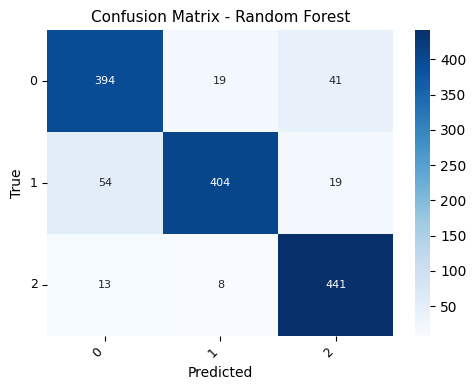

Model: Gradient Boosting
Accuracy: 0.8593
Macro Precision: 0.8652
Macro Recall: 0.8601
Macro F1-score: 0.8599

Detailed classification report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       454
           1       0.93      0.80      0.86       477
           2       0.89      0.90      0.90       462

    accuracy                           0.86      1393
   macro avg       0.87      0.86      0.86      1393
weighted avg       0.87      0.86      0.86      1393



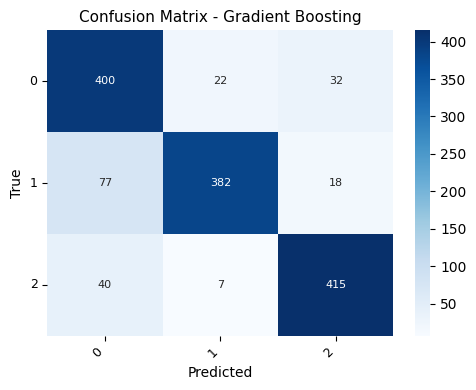

Model: XGBoost
Accuracy: 0.9067
Macro Precision: 0.9071
Macro Recall: 0.9068
Macro F1-score: 0.9067

Detailed classification report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       454
           1       0.93      0.89      0.91       477
           2       0.93      0.94      0.93       462

    accuracy                           0.91      1393
   macro avg       0.91      0.91      0.91      1393
weighted avg       0.91      0.91      0.91      1393



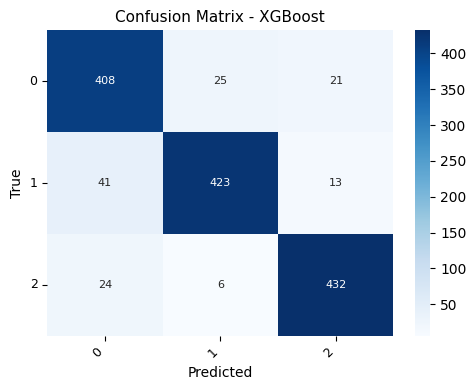

Model: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.492959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 219940
[LightGBM] [Info] Number of data points in the train set: 5571, number of used features: 7989
[LightGBM] [Info] Start training from score -1.119838
[LightGBM] [Info] Start training from score -1.071519
[LightGBM] [Info] Start training from score -1.105095


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9225
Macro Precision: 0.9226
Macro Recall: 0.9225
Macro F1-score: 0.9225

Detailed classification report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       454
           1       0.93      0.91      0.92       477
           2       0.95      0.95      0.95       462

    accuracy                           0.92      1393
   macro avg       0.92      0.92      0.92      1393
weighted avg       0.92      0.92      0.92      1393



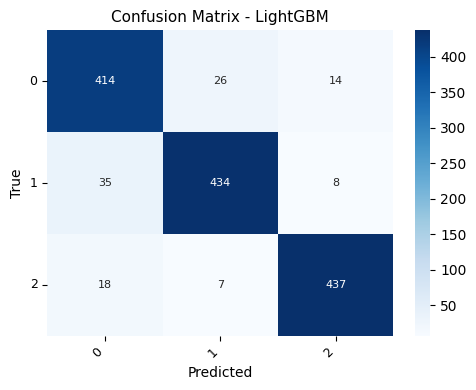

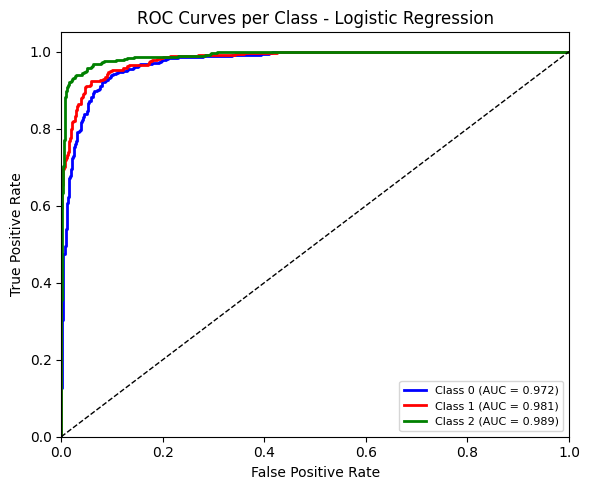

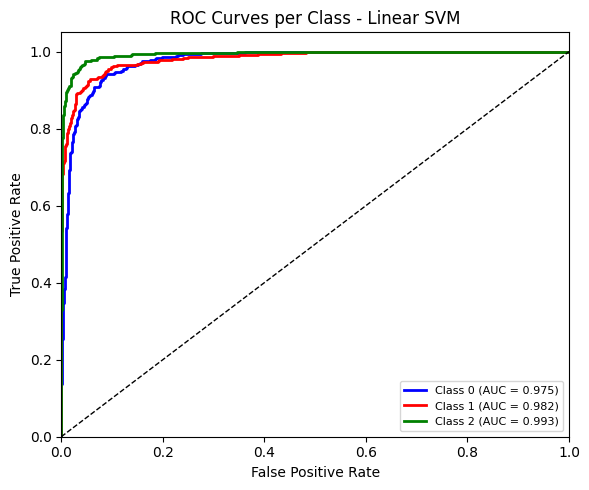

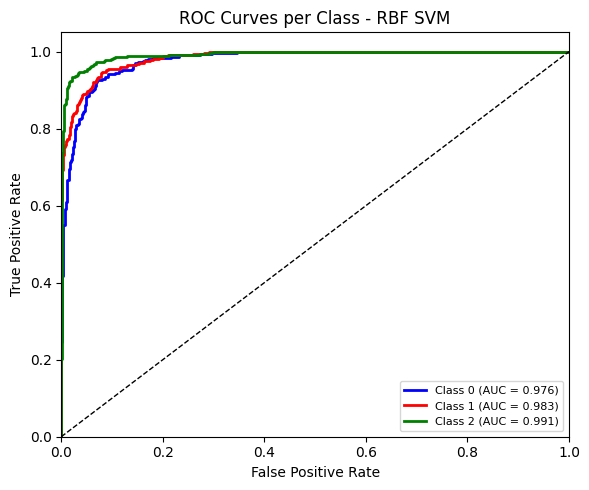

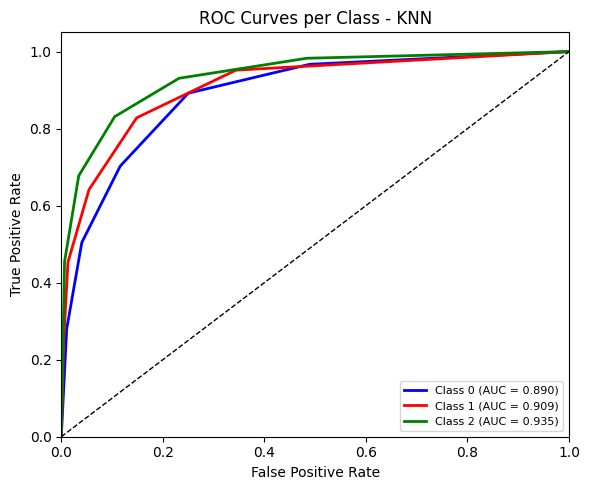

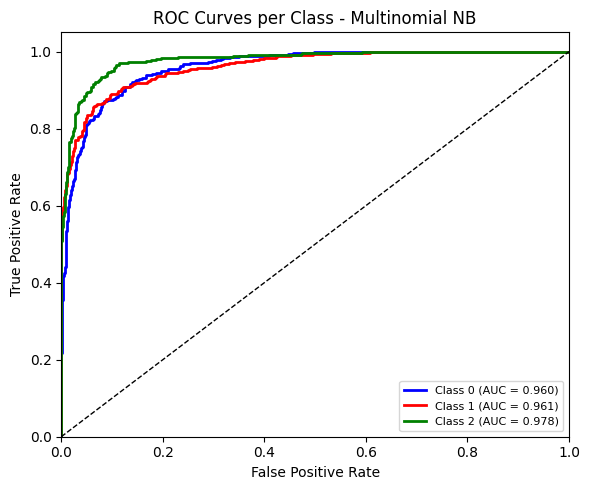

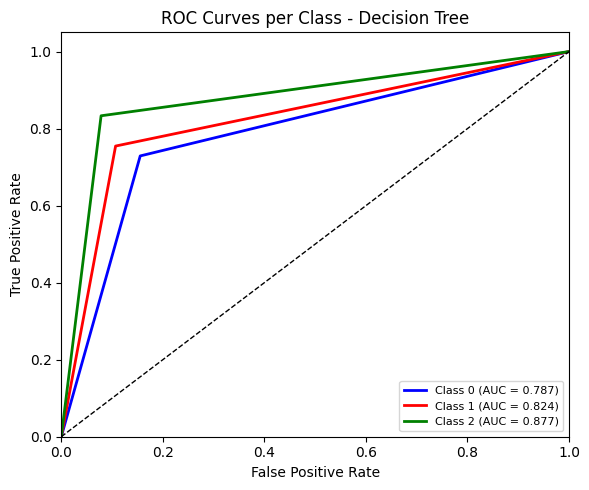

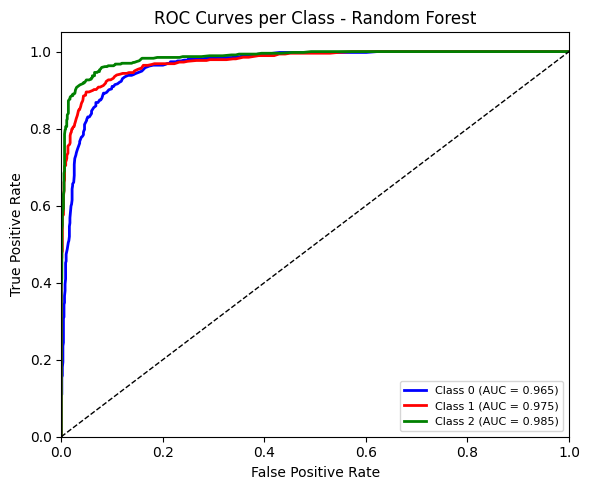

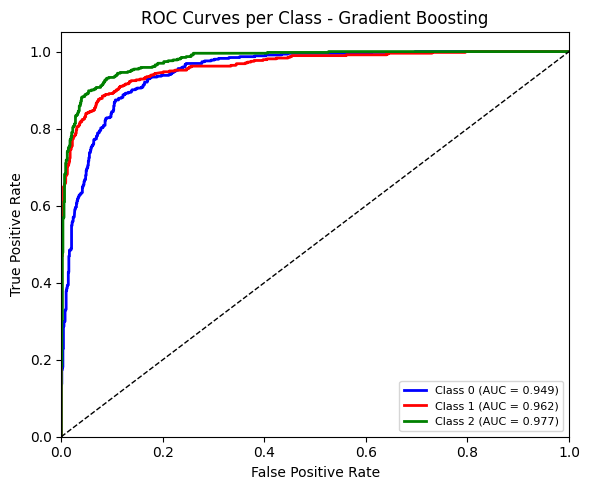

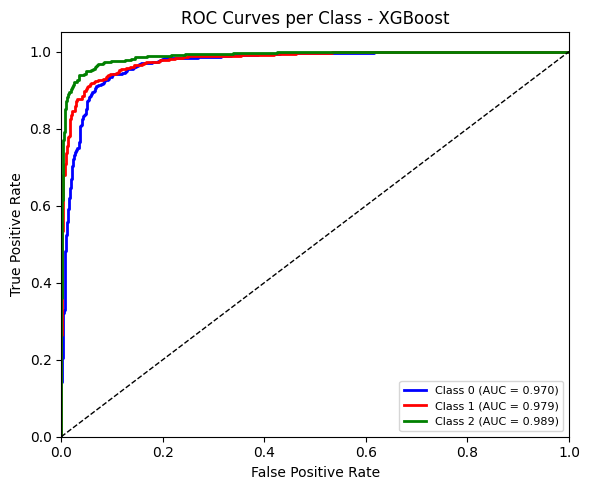

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


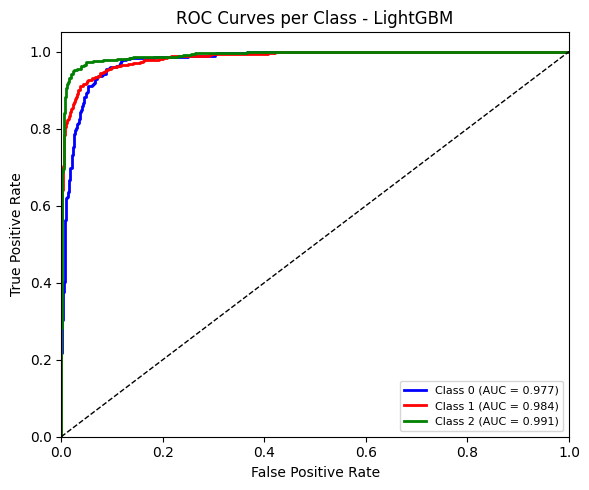


=== Overall Metrics Summary ===
                 Model  Accuracy  Macro Precision  Macro Recall  Macro F1
9             LightGBM  0.922469         0.922639      0.922545  0.922494
1           Linear SVM  0.913137         0.913952      0.913263  0.913286
2              RBF SVM  0.907394         0.907758      0.907706  0.907354
8              XGBoost  0.906676         0.907112      0.906845  0.906665
0  Logistic Regression  0.903087         0.903265      0.903419  0.903009
6        Random Forest  0.889447         0.890753      0.889782  0.888986
7    Gradient Boosting  0.859296         0.865203      0.860055  0.859872
4       Multinomial NB  0.847093         0.853721      0.845907  0.843421
5        Decision Tree  0.772434         0.773519      0.772375  0.772691
3                  KNN  0.765255         0.770711      0.766497  0.764711


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# ===========================
# 1. Data split
# ===========================
X = shuffled_mr[["Movie Review"]]
y = shuffled_mr["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# ==========================================
# 2. Common TF-IDF (word + char) transformer
# ==========================================
tfidf_word = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1, 2),
    min_df=3,
    max_features=20000
)

tfidf_char = TfidfVectorizer(
    analyzer='char',
    ngram_range=(3, 5),
    min_df=3
)

features = ColumnTransformer([
    ('word', tfidf_word, 'Movie Review'),
    ('char', tfidf_char, 'Movie Review'),
])


# ==========================================
# 3. Define all models
# ==========================================
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        C=1.0
    ),
    "Linear SVM": SVC(
        kernel='linear',
        probability=True,
        class_weight='balanced',
        random_state=42
    ),
    "RBF SVM": SVC(
        kernel='rbf',
        probability=True,
        class_weight='balanced',
        random_state=42
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=5
    ),
    "Multinomial NB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced'
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='multi:softprob',
        eval_metric='mlogloss',
        random_state=42,
        n_jobs=-1
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=300,
        learning_rate=0.1,
        objective='multiclass',
        random_state=42,
        n_jobs=-1
    )
}


# ==========================================
# 4. Train, evaluate, per-model confusion matrix
# ==========================================
results = []


def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=labels,
        yticklabels=labels,
        annot_kws={"size": 8}
    )
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    plt.title(title, fontsize=11)
    plt.xlabel("Predicted", fontsize=10)
    plt.ylabel("True", fontsize=10)
    plt.tight_layout()
    plt.show()


for name, clf in models.items():
    print("="*60)
    print(f"Model: {name}")
    print("="*60)

    # Build pipeline: TF-IDF + model
    pipe = Pipeline([
        ('tfidf', features),
        ('clf', clf)
    ])

    # Train
    pipe.fit(X_train, y_train)

    # Predict
    y_pred = pipe.predict(X_test)

    # Metrics (macro)
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, average='macro', zero_division=0
    )

    print(f"Accuracy: {acc:.4f}")
    print(f"Macro Precision: {precision:.4f}")
    print(f"Macro Recall: {recall:.4f}")
    print(f"Macro F1-score: {f1:.4f}")
    print("\nDetailed classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion matrix (separate, nice)
    labels = sorted(y_test.unique())
    plot_confusion_matrix(y_test, y_pred, labels, f"Confusion Matrix - {name}")

    # Save model + metrics for ROC later
    results.append({
        "name": name,
        "pipeline": pipe,
        "accuracy": acc,
        "precision_macro": precision,
        "recall_macro": recall,
        "f1_macro": f1
    })


# ==========================================
# 5. ROC Curve: per model, per class (0,1,2)
# ==========================================
classes = sorted(y.unique())          # e.g. [0,1,2] or ['negative','neutral','positive']
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

def plot_roc_per_class(name, pipe, X_test, y_test_bin, classes):
    # probability matrix: shape (n_samples, n_classes)
    y_score = pipe.predict_proba(X_test)

    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(6, 5))

    colors = ['blue', 'red', 'green', 'darkorange', 'purple', 'brown']
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=2,
            label=f"Class {classes[i]} (AUC = {roc_auc[i]:.3f})"
        )

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves per Class - {name}")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    plt.show()



for res in results:
    plot_roc_per_class(
        name=res["name"],
        pipe=res["pipeline"],
        X_test=X_test,
        y_test_bin=y_test_bin,
        classes=classes
    )


# ==========================================
# 6. Summary table of metrics
# ==========================================
summary_df = pd.DataFrame([
    {
        "Model": r["name"],
        "Accuracy": r["accuracy"],
        "Macro Precision": r["precision_macro"],
        "Macro Recall": r["recall_macro"],
        "Macro F1": r["f1_macro"]
    }
    for r in results
])

print("\n=== Overall Metrics Summary ===")
print(summary_df.sort_values(by="Macro F1", ascending=False))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


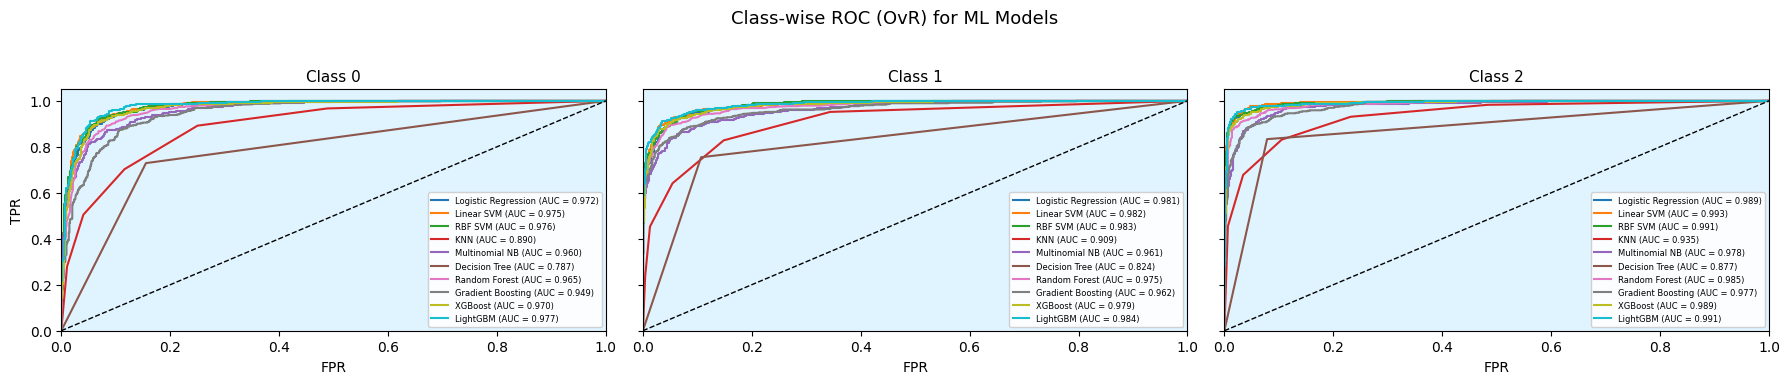

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt


# 1) classes & binarize
classes = sorted(y.unique())                 # e.g. [0,1,2]
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]


ml_scores = {}
for res in results:
    name = res["name"]
    pipe = res["pipeline"]
    ml_scores[name] = pipe.predict_proba(X_test)


model_colors = {
    "Logistic Regression": "#1f77b4",
    "Linear SVM":          "#ff7f0e",
    "RBF SVM":             "#2ca02c",
    "KNN":                 "#d62728",
    "Multinomial NB":      "#9467bd",
    "Decision Tree":       "#8c564b",
    "Random Forest":       "#e377c2",
    "Gradient Boosting":   "#7f7f7f",
    "XGBoost":             "#bcbd22",
    "LightGBM":            "#17becf",
}


fig, axes = plt.subplots(1, n_classes, figsize=(18, 4), sharey=True)

for class_idx in range(n_classes):
    ax = axes[class_idx]
    ax.set_facecolor("#e0f4ff")

    for model_name, y_score in ml_scores.items():

        color = model_colors.get(model_name, None)

        # One-vs-Rest for this class
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_idx], y_score[:, class_idx])
        roc_auc = auc(fpr, tpr)

        ax.plot(
            fpr,
            tpr,
            lw=1.5,
            label=f"{model_name} (AUC = {roc_auc:.3f})",
            color=color
        )

    ax.plot([0, 1], [0, 1], 'k--', lw=1)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("FPR")
    if class_idx == 0:
        ax.set_ylabel("TPR")
    ax.set_title(f"Class {classes[class_idx]}", fontsize=11)
    ax.legend(
        loc="lower right",
        fontsize=6,
        frameon=True,
        facecolor="white",
        framealpha=0.9
    )

plt.suptitle("Class-wise ROC (OvR) for ML Models", fontsize=13)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, classification_report



for name, y_pred in [
    ("LSTM", lstm_pred),
    ("BiLSTM", bilstm_pred),
    ("CNN", cnn_pred),
    ("GRU", gru_pred),
]:
    print("="*60)
    print(f"Metrics for {name}")
    print("="*60)


    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, average='macro', zero_division=0
    )

    print(f"Macro Precision: {precision:.4f}")
    print(f"Macro Recall:    {recall:.4f}")
    print(f"Macro F1-score:  {f1:.4f}")

    # full per-class report (optional)
    print("\nDetailed classification report:")
    print(classification_report(
        y_test, y_pred,
        target_names=label_encoder.classes_,
        zero_division=0
    ))


Metrics for LSTM
Macro Precision: 0.1141
Macro Recall:    0.3333
Macro F1-score:  0.1701

Detailed classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       454
           1       0.34      1.00      0.51       477
           2       0.00      0.00      0.00       462

    accuracy                           0.34      1393
   macro avg       0.11      0.33      0.17      1393
weighted avg       0.12      0.34      0.17      1393

Metrics for BiLSTM
Macro Precision: 0.8805
Macro Recall:    0.8806
Macro F1-score:  0.8801

Detailed classification report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       454
           1       0.90      0.88      0.89       477
           2       0.88      0.93      0.91       462

    accuracy                           0.88      1393
   macro avg       0.88      0.88      0.88      1393
weighted avg       0.88      0.88      0.88    

In [ ]:
# ===========================
# 0. Imports
# ===========================
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, GRU, Bidirectional,
    Conv1D, GlobalMaxPooling1D,
    Dense, Dropout
)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)



X = shuffled_mr["Movie Review"].astype(str)
y = shuffled_mr["Sentiment"].astype(str)

# label encode (0,1,2,...)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

num_classes = len(np.unique(y_train))

# ===========================
# 2. Tokenizer + padding
# ===========================
max_words = 20000   # vocab size
max_len = 200       # max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(
    X_train_seq, maxlen=max_len, padding="post", truncating="post"
)
X_test_pad = pad_sequences(
    X_test_seq, maxlen=max_len, padding="post", truncating="post"
)

# ===========================
# 3. Helper: compile, train, evaluate
# ===========================
def compile_and_train(model, X_tr, y_tr, X_te, y_te,
                      model_name="Model", epochs=5, batch_size=64):
    """
    Generic train + evaluate function for DL models.
    """
    if num_classes == 2:
        loss_fn = "binary_crossentropy"
        out_activation = "sigmoid"
    else:
        loss_fn = "sparse_categorical_crossentropy"
        out_activation = "softmax"

    # ensure last Dense layer activation
    if isinstance(model.layers[-1], Dense):
        model.layers[-1].activation = tf.keras.activations.get(out_activation)

    model.compile(
        loss=loss_fn,
        optimizer="adam",
        metrics=["accuracy"]
    )

    print("=" * 60)
    print(f"Training: {model_name}")
    print("=" * 60)

    history = model.fit(
        X_tr, y_tr,
        validation_split=0.1,
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    print(f"\nEvaluating: {model_name}")
    y_prob = model.predict(X_te)

    if num_classes == 2:
        y_pred = (y_prob.ravel() > 0.5).astype(int)
    else:
        y_pred = np.argmax(y_prob, axis=1)

    acc = accuracy_score(y_te, y_pred)
    print(f"Test Accuracy ({model_name}): {acc:.4f}\n")

    print("Classification report:")
    print(classification_report(
        y_te, y_pred,
        target_names=label_encoder.classes_
    ))

    print("Confusion matrix:")
    print(confusion_matrix(y_te, y_pred))

    return model, history, y_prob, y_pred, acc

# ===========================
# 4. Model definitions
# ===========================
def build_lstm_model():
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
        LSTM(128, return_sequences=False),
        Dropout(0.5),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(num_classes)  # activation set later
    ])
    return model

def build_bilstm_model():
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
        Bidirectional(LSTM(128, return_sequences=False)),
        Dropout(0.5),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(num_classes)
    ])
    return model

def build_cnn_model():
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
        Conv1D(filters=128, kernel_size=5, activation="relu"),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(num_classes)
    ])
    return model

def build_gru_model():
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
        GRU(128, return_sequences=False),
        Dropout(0.5),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(num_classes)
    ])
    return model

# ===========================
# 5. Train all DL models
# ===========================
results_dl = []

# LSTM
lstm_model = build_lstm_model()
lstm_model, lstm_history, lstm_prob, lstm_pred, lstm_acc = compile_and_train(
    lstm_model, X_train_pad, y_train, X_test_pad, y_test,
    model_name="LSTM", epochs=5, batch_size=64
)
results_dl.append({"Model": "LSTM", "Accuracy": lstm_acc})

# BiLSTM
bilstm_model = build_bilstm_model()
bilstm_model, bilstm_history, bilstm_prob, bilstm_pred, bilstm_acc = compile_and_train(
    bilstm_model, X_train_pad, y_train, X_test_pad, y_test,
    model_name="BiLSTM", epochs=5, batch_size=64
)
results_dl.append({"Model": "BiLSTM", "Accuracy": bilstm_acc})

# CNN
cnn_model = build_cnn_model()
cnn_model, cnn_history, cnn_prob, cnn_pred, cnn_acc = compile_and_train(
    cnn_model, X_train_pad, y_train, X_test_pad, y_test,
    model_name="CNN", epochs=5, batch_size=64
)
results_dl.append({"Model": "CNN", "Accuracy": cnn_acc})

# GRU
gru_model = build_gru_model()
gru_model, gru_history, gru_prob, gru_pred, gru_acc = compile_and_train(
    gru_model, X_train_pad, y_train, X_test_pad, y_test,
    model_name="GRU", epochs=5, batch_size=64
)
results_dl.append({"Model": "GRU", "Accuracy": gru_acc})

# ===========================
# 6. Summary table of DL models
# ===========================
dl_summary_df = pd.DataFrame(results_dl)
print("\n=== Deep Learning Models Summary ===")
print(dl_summary_df.sort_values(by="Accuracy", ascending=False))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training: LSTM
Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 511ms/step - accuracy: 0.3421 - loss: 1.1004 - val_accuracy: 0.3423 - val_loss: 1.0985
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 534ms/step - accuracy: 0.3401 - loss: 1.0994 - val_accuracy: 0.3423 - val_loss: 1.0991
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 549ms/step - accuracy: 0.3366 - loss: 1.1001 - val_accuracy: 0.3423 - val_loss: 1.0997
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 88s 633ms/step - accuracy: 0.3275 - loss: 1.0997 - val_accuracy: 0.3423 - val_loss: 1.0985
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 76s 562ms/step - accuracy: 0.3191 - loss: 1.0997 - val_accuracy: 0.3423 - val_loss: 1.0987

Evaluating: LSTM
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step
Test Accuracy (LSTM): 0.3424

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       454
           1       0.34      1.00      0.51       477
           2       0.00      0.00      0.00       462

    accuracy   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/keras/src

79/79 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.4288 - loss: 1.0234 - val_accuracy: 0.7563 - val_loss: 0.5547
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 76s 961ms/step - accuracy: 0.8345 - loss: 0.4200 - val_accuracy: 0.8423 - val_loss: 0.4509
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9466 - loss: 0.1763 - val_accuracy: 0.8746 - val_loss: 0.3873
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 76s 967ms/step - accuracy: 0.9794 - loss: 0.0759 - val_accuracy: 0.8817 - val_loss: 0.3486
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 78s 990ms/step - accuracy: 0.9907 - loss: 0.0354 - val_accuracy: 0.8889 - val_loss: 0.4515

Evaluating: BiLSTM
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step
Test Accuracy (BiLSTM): 0.8808

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       454
           1       0.90      0.88      0.89       477
           2       0.88      0.93      0.91       462

    accuracy                           0.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 238ms/step - accuracy: 0.3950 - loss: 1.0716 - val_accuracy: 0.6971 - val_loss: 0.6847
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 211ms/step - accuracy: 0.7191 - loss: 0.6203 - val_accuracy: 0.8781 - val_loss: 0.3959
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 199ms/step - accuracy: 0.9277 - loss: 0.2496 - val_accuracy: 0.8943 - val_loss: 0.3300
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 213ms/step - accuracy: 0.9757 - loss: 0.0887 - val_accuracy: 0.8889 - val_loss: 0.3270
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 190ms/step - accuracy: 0.9885 - loss: 0.0483 - val_accuracy: 0.8781 - val_loss: 0.3796

Evaluating: CNN
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Test Accuracy (CNN): 0.9024

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       454
           1       0.88      0.93      0.90       477
           2       0.93      0.92      0.92       462

    accuracy                           0.90

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 534ms/step - accuracy: 0.3291 - loss: 1.1004 - val_accuracy: 0.3477 - val_loss: 1.0985
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 520ms/step - accuracy: 0.3407 - loss: 1.0990 - val_accuracy: 0.3477 - val_loss: 1.0983
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 82s 521ms/step - accuracy: 0.3245 - loss: 1.1006 - val_accuracy: 0.3100 - val_loss: 1.0990
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 83s 530ms/step - accuracy: 0.3342 - loss: 1.0989 - val_accuracy: 0.3423 - val_loss: 1.0979
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 547ms/step - accuracy: 0.3367 - loss: 1.0991 - val_accuracy: 0.3423 - val_loss: 1.0988

Evaluating: GRU
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step
Test Accuracy (GRU): 0.3424

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       454
           1       0.34      1.00      0.51       477
           2       0.00      0.00      0.00       462

    accuracy                           0.34

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


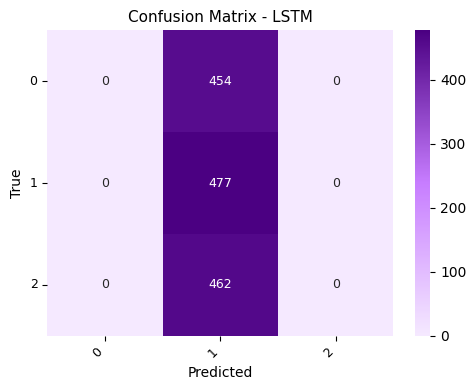

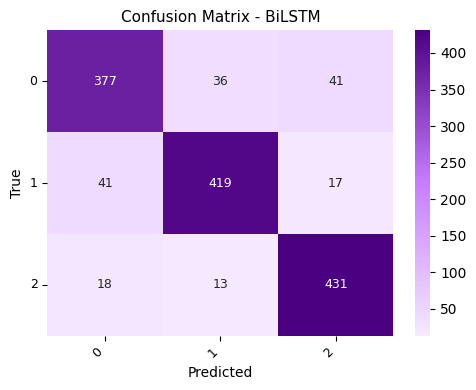

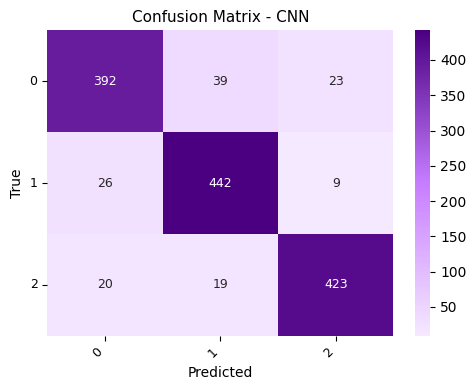

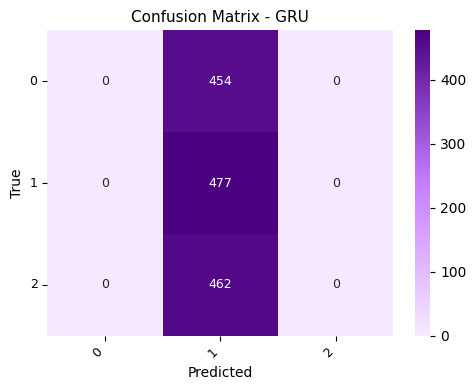

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

classes = label_encoder.classes_

# custom soft-purple colormap: light → medium → dark purple
soft_purple_cmap = LinearSegmentedColormap.from_list(
    "soft_purple",
    ["#f5e9ff", "#c77dff", "#4b0082"]  # very light purple, mid, deep
)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))

    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap=soft_purple_cmap,      # use custom purple-only cmap
        xticklabels=classes,
        yticklabels=classes,
        annot_kws={"size": 9}
    )

    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    plt.title(f"Confusion Matrix - {title}", fontsize=11)
    plt.xlabel("Predicted", fontsize=10)
    plt.ylabel("True", fontsize=10)
    plt.tight_layout()
    plt.show()

# DL models
plot_confusion_matrix(y_test, lstm_pred,   "LSTM")
plot_confusion_matrix(y_test, bilstm_pred, "BiLSTM")
plot_confusion_matrix(y_test, cnn_pred,    "CNN")
plot_confusion_matrix(y_test, gru_pred,    "GRU")




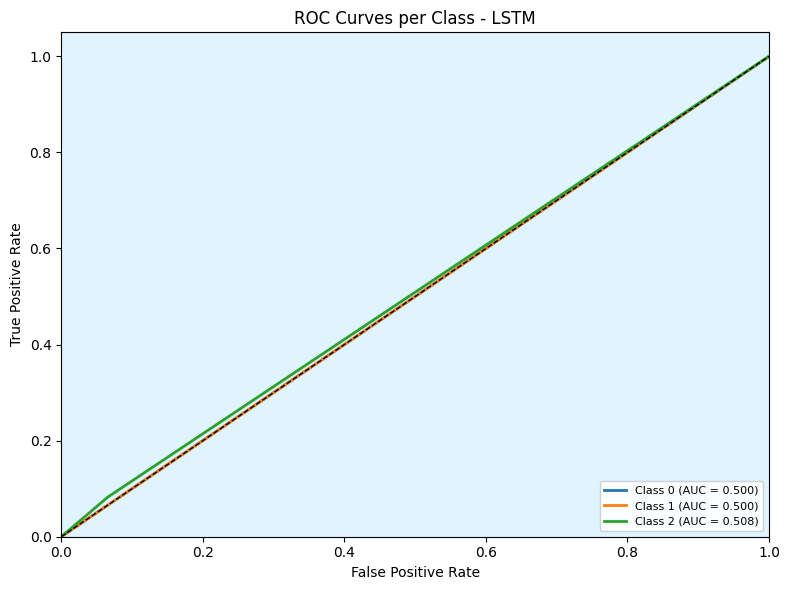

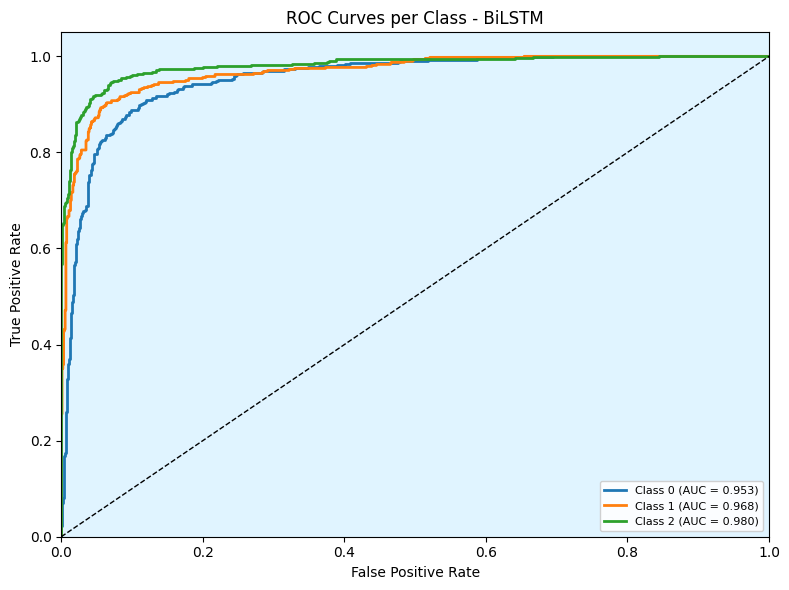

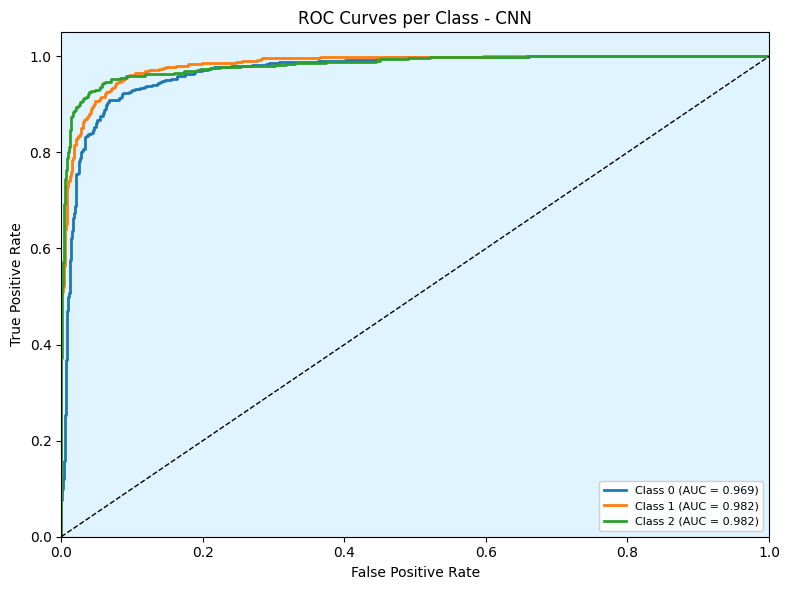

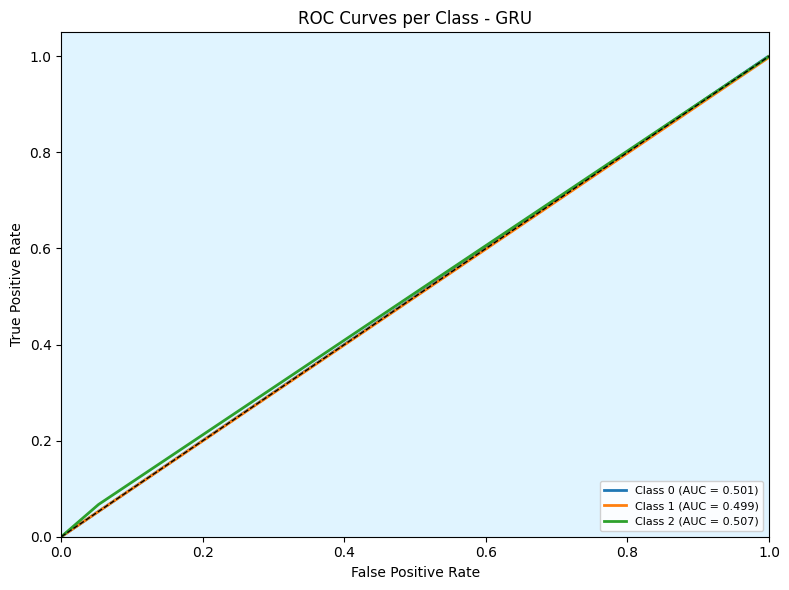

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# classes & binarize
classes = np.arange(num_classes)      # 0,1,2,...
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

def plot_roc_per_class_model(name, y_score):
    """
    y_score: probability matrix (n_samples, n_classes)
    Protiti class (0,1,2) er jonno One-vs-Rest ROC.
    """
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_facecolor("#e0f4ff")

    colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

    for i, color in zip(range(n_classes), colors):
        ax.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=2,
            label=f"Class {classes[i]} (AUC = {roc_auc[i]:.3f})"
        )

    ax.plot([0, 1], [0, 1], 'k--', lw=1)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"ROC Curves per Class - {name}")
    ax.legend(loc="lower right", fontsize=8, frameon=True, facecolor="white", framealpha=0.9)
    plt.tight_layout()
    plt.show()

# DL models: *_prob from compile_and_train
plot_roc_per_class_model("LSTM",   lstm_prob)
plot_roc_per_class_model("BiLSTM", bilstm_prob)
plot_roc_per_class_model("CNN",    cnn_prob)
plot_roc_per_class_model("GRU",    gru_prob)


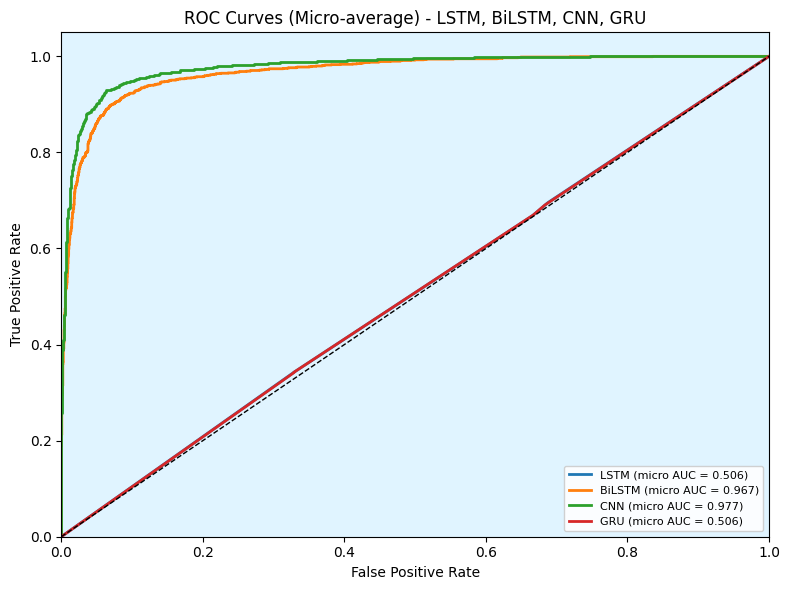

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# classes & binarize
classes = np.arange(num_classes)      # 0,1,2,...
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_facecolor("#e0f4ff")

def plot_roc_for_model(name, y_score, color):
    """
    y_score: probability matrix (n_samples, n_classes)
    micro-average ROC ekta line hishebe plot.
    """
    # micro-average: sob class ravel kore
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, color=color, label=f"{name} (micro AUC = {roc_auc:.3f})")

# DL models: *_prob from compile_and_train
plot_roc_for_model("LSTM",   lstm_prob,   "#1f77b4")  # blue
plot_roc_for_model("BiLSTM", bilstm_prob, "#ff7f0e")  # orange
plot_roc_for_model("CNN",    cnn_prob,    "#2ca02c")  # green
plot_roc_for_model("GRU",    gru_prob,    "#d62728")  # red

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Micro-average) - LSTM, BiLSTM, CNN, GRU")
plt.legend(loc="lower right", fontsize=8, frameon=True, facecolor="white", framealpha=0.9)
plt.tight_layout()
plt.show()


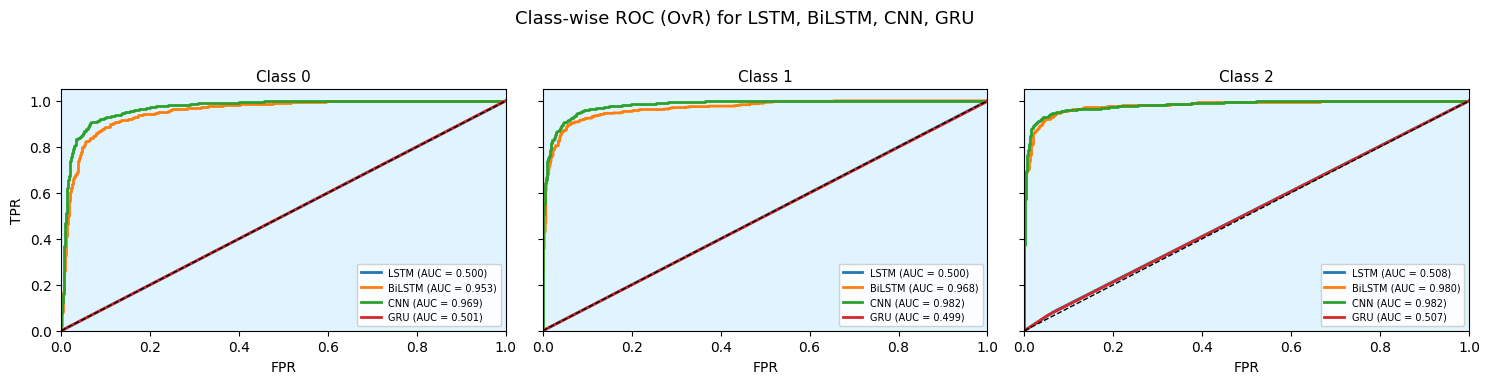

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# classes & binarize
classes = np.arange(num_classes)      # 0,1,2,...
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# DL model probabilities: lstm_prob, bilstm_prob, cnn_prob, gru_prob
model_scores = {
    "LSTM":   lstm_prob,
    "BiLSTM": bilstm_prob,
    "CNN":    cnn_prob,
    "GRU":    gru_prob
}

model_colors = {
    "LSTM":   "#1f77b4",  # blue
    "BiLSTM": "#ff7f0e",  # orange
    "CNN":    "#2ca02c",  # green
    "GRU":    "#d62728"   # red
}

fig, axes = plt.subplots(1, n_classes, figsize=(15, 4), sharey=True)

for class_idx in range(n_classes):
    ax = axes[class_idx]
    ax.set_facecolor("#e0f4ff")  # light sky background

    for model_name, y_score in model_scores.items():
        # One-vs-Rest for this class
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_idx], y_score[:, class_idx])
        roc_auc = auc(fpr, tpr)

        ax.plot(
            fpr,
            tpr,
            lw=2,
            color=model_colors[model_name],
            label=f"{model_name} (AUC = {roc_auc:.3f})"
        )

    ax.plot([0, 1], [0, 1], 'k--', lw=1)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("FPR")
    if class_idx == 0:
        ax.set_ylabel("TPR")
    ax.set_title(f"Class {classes[class_idx]}", fontsize=11)
    ax.legend(loc="lower right", fontsize=7, frameon=True, facecolor="white", framealpha=0.9)

plt.suptitle("Class-wise ROC (OvR) for LSTM, BiLSTM, CNN, GRU", fontsize=13)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
